Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [129]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [130]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as mpl
import os


Download the data and save it as a pandas DataFrame.

major crypyo currency chosen BTC-USD

In [131]:
initial_data = yf.download("BTC-USD", start="2021-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [132]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [133]:
initial_data['Adj Close'].head()

Date
2021-01-01    29374.152344
2021-01-02    32127.267578
2021-01-03    32782.023438
2021-01-04    31971.914062
2021-01-05    33992.429688
Name: Adj Close, dtype: float64

In [134]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 911 entries, 2021-01-01 to 2023-06-30
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
911 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [135]:
data.head()

Date
2021-01-01    29374.152344
2021-01-02    32127.267578
2021-01-03    32782.023438
2021-01-04    31971.914062
2021-01-05    33992.429688
Name: Adj Close, dtype: float64

In [136]:
data.tail()

Date
2023-06-26    30271.130859
2023-06-27    30688.164062
2023-06-28    30086.246094
2023-06-29    30445.351562
2023-06-30    30723.050781
Name: Adj Close, dtype: float64

In [137]:
data = yf.download("BTC-USD", start="2022-06-30", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [138]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 30445.35


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

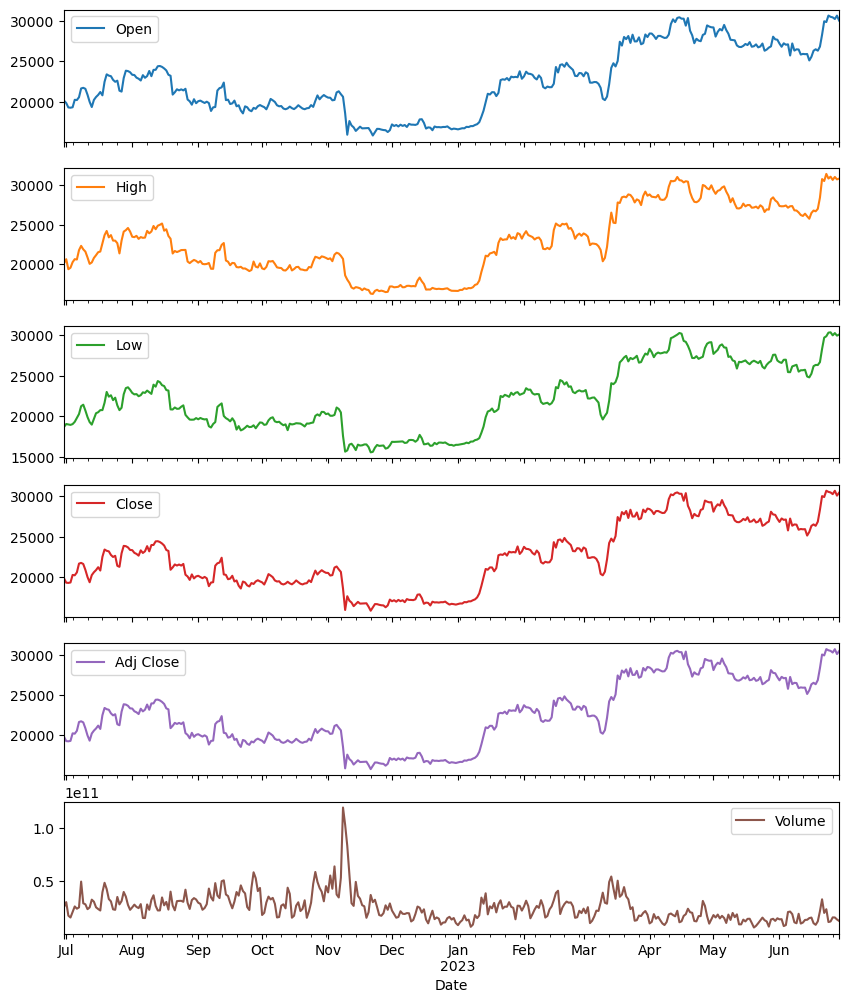

In [139]:
data.plot(figsize=(10, 12), subplots=True)

Find the log return of Index

In [140]:
data = yf.download("USDT-USD", start="2022-06-30", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [141]:
log_return = np.log(data['Adj Close']) / data['Adj Close'].shift(1)

Calculate its standard deviation and annualising it

In [142]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 1.56 %


Volatility measures of how much its price changes in a given period of time. When a stock that normally trades in a 1% range of its price on a daily basis suddenly trades 4-5% of its price, it's considered to be experiencing “high volatility.” Based on our computation of a 1.56% volatility and hence normal trades are in a 1% range of its price on a daily basis the volatility is low relatively hence predictable.” 

Compare it with the VIX data

Download VIX data for comparison



In [143]:
VIX = yf.download("^VIX", start="2022-06-30", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [144]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 13.54 %


Black scholes Model



European Options
Non-Dividend Paying Options

In [145]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as mpl
import os


In [146]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [147]:
S = 24334
K = 24300
T = 1  # 1 year
r = 0.03
vol = 0.0156
payoff = "call"

In [148]:
euro_option_bs(24334, 24300, 1, 0.03, 0.0156, 'call')

755.2400152213413

In [149]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 24334, 24300, 755, 0.03, 'call')

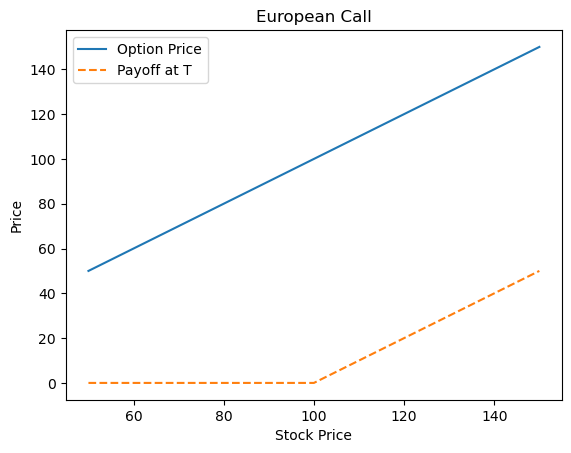

In [150]:
fig = mpl.figure()
mpl.plot(S, cp, '-')
mpl.plot(S, np.maximum(S-100,0), '--')
mpl.xlabel('Stock Price')
mpl.ylabel('Price')
mpl.title('European Call')
mpl.legend(['Option Price','Payoff at T'])

Monte Carlo Simulation

It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [151]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [152]:
T = 1
r = 0.03
sigma = 0.0156
S0 = 24334
K = 24300

In [153]:
S = mcs_simulation_np(1000)

In [154]:
S = np.transpose(S)
S

array([[24334.        , 24325.5139327 , 24331.04908026, ...,
        25095.31711792, 25111.65634601, 25126.20821497],
       [24334.        , 24329.71140698, 24333.65965215, ...,
        25355.00448535, 25332.06204343, 25321.19881434],
       [24334.        , 24315.13816322, 24301.3065709 , ...,
        25262.3743766 , 25278.92350317, 25266.99106304],
       ...,
       [24334.        , 24350.4961887 , 24347.39111984, ...,
        24652.65460861, 24647.4827383 , 24654.54050432],
       [24334.        , 24329.71946505, 24331.89548282, ...,
        24794.9094649 , 24797.07798901, 24803.23593863],
       [24334.        , 24331.73941334, 24328.75360963, ...,
        25535.3124229 , 25529.27274607, 25532.40524728]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

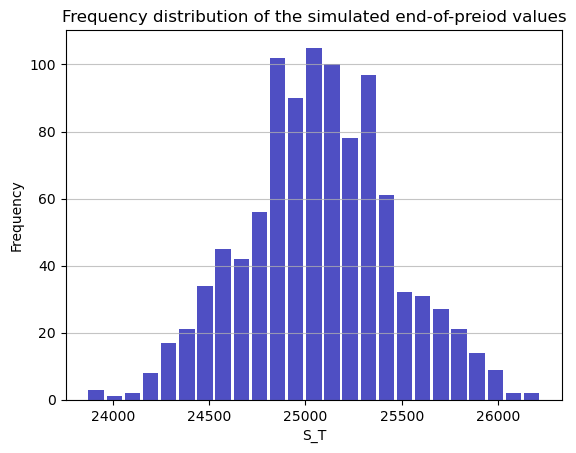

In [155]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [156]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 771.897020262559


Greeks

Option Value

In [157]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [158]:
T = 1                            
r = 0.03
sigma = 0.0156
S0 = 24334
K = 24300
q = 0

In [159]:
euro_option_bsm(1, 0.95, 0.083, 0, 0.03, 0.415, 'call')

0.07398360421196437

In [160]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 24334, 24300, 1, 0.03, 0.0156, 'call')
    Put [i] = euro_option_bsm(S[i], 24334, 24300, 1, 0.03, 0.0156, 'put')

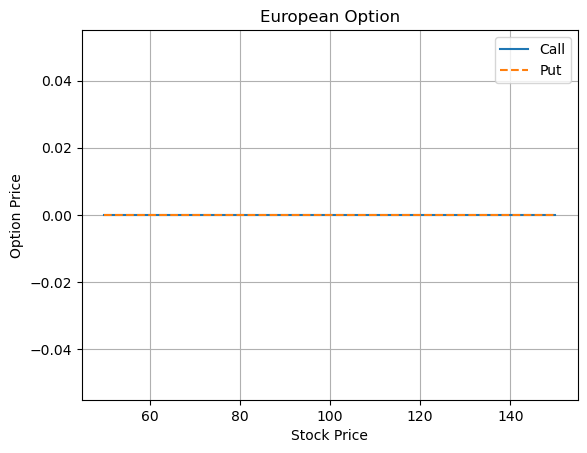

In [161]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [162]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [163]:
T = 1                            #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0156                        #T: time to maturity
S0 = 24334                                  #r: risk free rate
K =24300                                #vol: volatility of underlying asset
q = 0                                   #q: continuous dividend yield

In [164]:
delta(24334, 24300, 1, 0.03, 0, 0.0156, 'call')

0.9783344873667189

In [165]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 24334, 24300, 1, 0.03, 0.0156, 'call')
    Delta_Put [i] = delta(S[i], 24334, 24300, 1, 0.03, 0.0156, 'put')

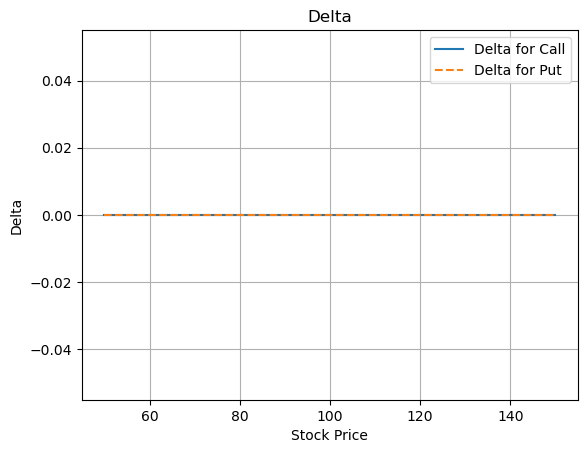

In [166]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [167]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [168]:
T = 1                            #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0156                        #T: time to maturity
S0 = 24334                                  #r: risk free rate
K =24300                                #vol: volatility of underlying asset
q = 0                                   #q: continuous dividend yield

In [169]:
gamma(24334, 24300, 1, 0.03, 0, 0.0156, 'call')

0.00013648383758963108

In [170]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 24334, 24300, 1, 0.03, 0.0156, 'call')

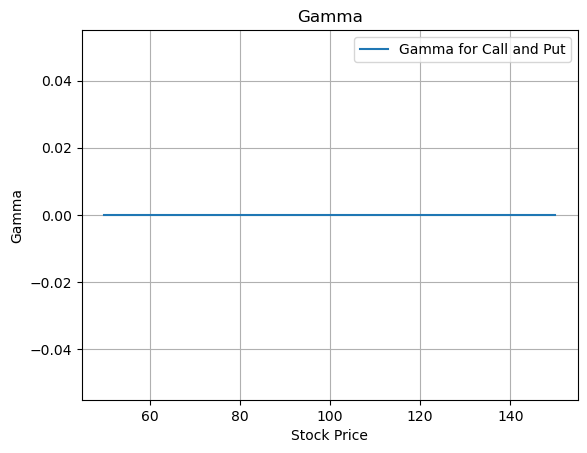

In [171]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [172]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [173]:
T = 1                            #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0156                        #T: time to maturity
S0 = 24334                                  #r: risk free rate
K =24300                                #vol: volatility of underlying asset
q = 0                                   #q: continuous dividend yield

In [174]:
speed(24334, 24300, 1, 0.03, 0, 0.0156, 'call')

-7.320543195035838e-07

In [175]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 24334, 24300, 1, 0.03, 0.0156, 'call')


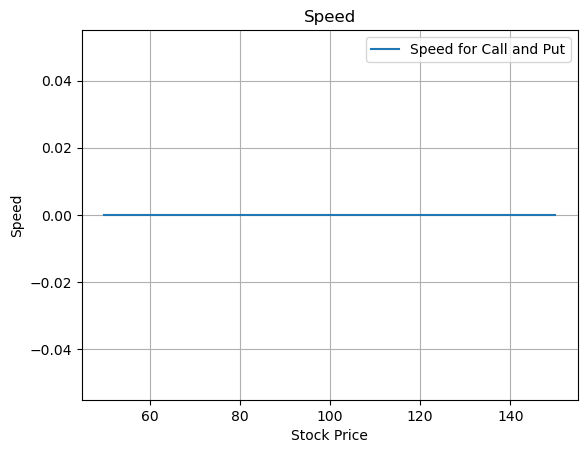

In [176]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".



In [177]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [178]:
T = 1                            #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0156                        #T: time to maturity
S0 = 24334                                  #r: risk free rate
K =24300                                #vol: volatility of underlying asset
q = 0   

In [179]:
theta(24334, 24300, 1, 0.03, 0, 0.0156, 'call')

701.3804792839112

In [180]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 1, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(100, 100, T[i], 1, 0.03, 0.25, 'put')

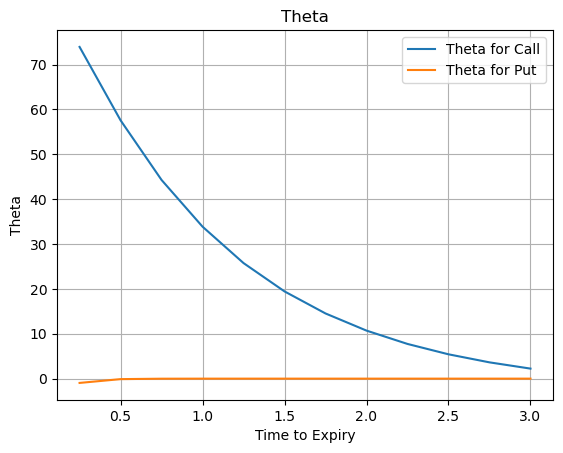

In [181]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [182]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [183]:
T = 1                            #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0156                        #T: time to maturity
S0 = 24334                                  #r: risk free rate
K =24300                                #vol: volatility of underlying asset
q = 0   

In [184]:
rho(24334, 24300, 1, 0.03, 0, 0.0156, 'call')

23051.551400360397

In [185]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 24334, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(100, 100, 24334, r[i], 0.03, 0.25, 'put')

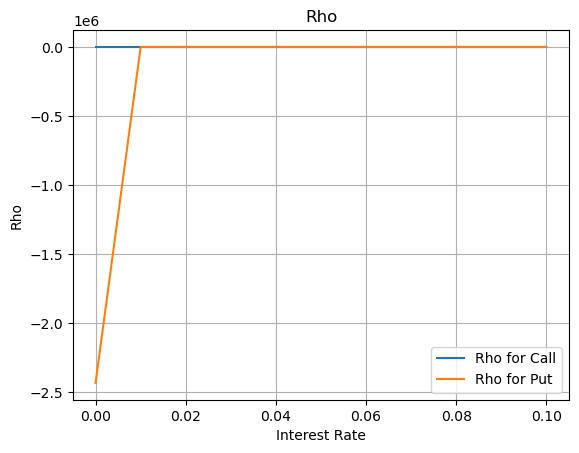

In [186]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])